In [2]:
# import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Improve visualization aesthetics
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 5)

# Load dataset 
df = pd.read_csv("../data/raw/complaints.csv")

# Preview data
df.head()

C:\Users\HP EliteBook\AppData\Local\Temp\ipykernel_33908\4124170448.py:11: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../data/raw/complaints.csv")


,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,Experian Information Solutions Inc.,FL,32092,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195687
1,2025-06-20,Debt collection,Telecommunications debt,Attempts to collect debt not owed,Debt is not yours,NaN,Company can't verify or dispute the facts in t...,"Eastern Account Systems of Connecticut, Inc.",FL,342XX,NaN,NaN,Web,2025-06-20,Closed with explanation,Yes,NaN,14195688
2,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",AZ,85225,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195689
3,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,Experian Information Solutions Inc.,AZ,85225,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195690
4,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Account status incorrect,NaN,NaN,Experian Information Solutions Inc.,IL,60628,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195692


In [4]:
# dataset shape
df.shape

(9609797, 18)

In [ ]:
# columns and their datatype
df.info

<bound method DataFrame.info of         Date received                                            Product  \
0          2025-06-20  Credit reporting or other personal consumer re...   
1          2025-06-20                                    Debt collection   
2          2025-06-20  Credit reporting or other personal consumer re...   
3          2025-06-20  Credit reporting or other personal consumer re...   
4          2025-06-20  Credit reporting or other personal consumer re...   
...               ...                                                ...   
9609792    2016-09-08                                   Credit reporting   
9609793    2022-06-06  Credit reporting, credit repair services, or o...   
9609794    2016-07-14                                   Credit reporting   
9609795    2014-03-03                                   Credit reporting   
9609796    2014-11-10                                   Credit reporting   

                     Sub-product  \
0               Cre

In [6]:
# checking a missing values
df.isnull().sum()

Date received                         0
Product                               0
Sub-product                      235295
Issue                                 6
Sub-issue                        839522
Consumer complaint narrative    6629041
Company public response         4770207
Company                               0
State                             54516
ZIP code                          30228
Tags                            8981029
Consumer consent provided?      1649561
Submitted via                         0
Date sent to company                  0
Company response to consumer         20
Timely response?                      0
Consumer disputed?              8841498
Complaint ID                          0
dtype: int64

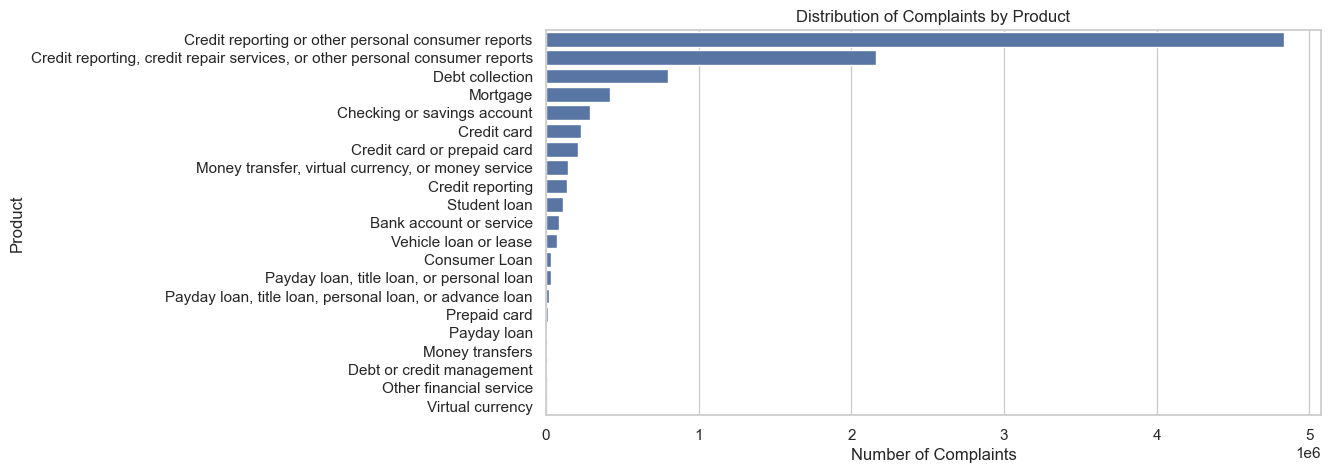

In [ ]:
# Distribution of Complaints by Product
# Count complaints by product
product_counts = df["Product"].value_counts()

# Bar chart
sns.barplot(
    x=product_counts.values,
    y=product_counts.index
)
plt.title("Distribution of Complaints by Product")
plt.xlabel("Number of Complaints")
plt.ylabel("Product")
plt.show()


In [8]:
#4. Narrative Length Analysis (Word Count)
# Calculate word count
df["narrative_word_count"] = (
    df["Consumer complaint narrative"]
    .dropna()
    .apply(lambda x: len(x.split()))
)

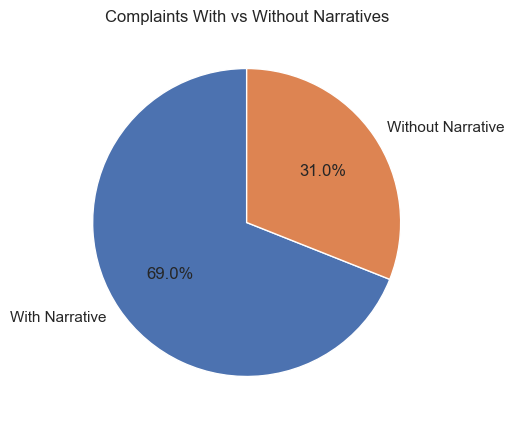

In [9]:
# 5. Complaints With vs Without Narratives
narrative_counts = df["Consumer complaint narrative"].notna().value_counts()

labels = ["With Narrative", "Without Narrative"]

plt.pie(
    narrative_counts,
    labels=labels,
    autopct="%1.1f%%",
    startangle=90
)
plt.title("Complaints With vs Without Narratives")
plt.show()

In [11]:
# 6. Filter Dataset (Project Requirements)
allowed_products = [
    "Credit card",
    "Personal loan",
    "Savings account",
    "Money transfer"
]
filtered_df = df[
    (df["Product"].isin(allowed_products)) &
    (df["Consumer complaint narrative"].notna())
].copy()

filtered_df.shape


(80667, 19)

In [14]:
# 7. Text Cleaning for Better Embeddings
import re

def clean_text(text):
    text = text.lower()
    
    # Remove boilerplate phrases
    text = re.sub(
        r"i am writing to file a complaint.*?that",
        "",
        text
    )
    
    # Remove special characters and digits
    text = re.sub(r"[^a-z\s]", "", text)
    
    # Remove extra whitespace
    text = re.sub(r"\s+", " ", text).strip()
    
    return text

filtered_df["clean_narrative"] = (
    filtered_df["Consumer complaint narrative"]
    .apply(clean_text)
)

filtered_df[["Consumer complaint narrative", "clean_narrative"]].head()


,Consumer complaint narrative,clean_narrative
12237,A XXXX XXXX card was opened under my name by a...,a xxxx xxxx card was opened under my name by a...
13280,"Dear CFPB, I have a secured credit card with c...",dear cfpb i have a secured credit card with ci...
13506,I have a Citi rewards cards. The credit balanc...,i have a citi rewards cards the credit balance...
13955,b'I am writing to dispute the following charge...,bi am writing to dispute the following charges...
14249,"Although the account had been deemed closed, I...",although the account had been deemed closed i ...


In [15]:
# 8. Save Cleaned Dataset
filtered_df.to_csv(
    "../data/processed/filtered_complaints.csv",
    index=False
)